In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка данных

In [5]:
bsm = pd.read_csv('bsm_data_train.csv')
bsm = pd.DataFrame(bsm)
bsm.tail()

,ident_bag,i_id,pax_id_hash,MessageReceivedDate,MessageProcessedDate,DateEvent,TagNumber,local_or_transfer
2090176,64616153,8687750.0,1724dd3d56108fea2c917f370f77e664,2023-08-31 23:59:50.757,2023-08-31 23:59:53.393,2023-08-31 23:59:53.390,263789487,L
2090177,64616152,8687783.0,45ca01ef5df1fda1da6b9a85e0a26628,2023-08-31 23:59:50.757,2023-08-31 23:59:53.370,2023-08-31 23:59:53.367,395191461,L
2090178,64616154,8687786.0,2acb4b86315d6e49efc0a824b3cba80d,2023-08-31 23:59:53.600,2023-08-31 23:59:57.260,2023-08-31 23:59:57.257,7115420782,L
2090179,64616155,8687774.0,1d767047c6955c86ef4e0626bc60d213,2023-08-31 23:59:55.637,2023-08-31 23:59:57.413,2023-08-31 23:59:57.413,216561658,L
2090180,64616156,8688045.0,e00a871c3291782beb9de879fa5bcf71,2023-08-31 23:59:56.857,2023-08-31 23:59:57.547,2023-08-31 23:59:57.543,555105787,T


In [6]:
bsm.isnull().sum(axis = 0)

ident_bag               0
i_id                    0
pax_id_hash             0
MessageReceivedDate     0
MessageProcessedDate    0
DateEvent               0
TagNumber               0
local_or_transfer       0
dtype: int64

In [7]:
#удалим пропуск в последней строке
bsm = bsm[:-1]

In [8]:
flight = pd.read_csv('flight_rasp_data.csv')
flight = pd.DataFrame(flight)
flight.head()

,i_id,departure_terminal,checkin_terminal,airline_grouped_hash,cco_hash,flt_hash,t_st,m_city_rus1,m_city_rus2,config
0,8634957.0,B,B,7bac920cc30511dfb81ca2242b293990,f7adf0ba18d705092fa0a1e2f2c0bafb,6a2feef8ed6a9fe76d6b3f30f02150b4,2023-07-08 00:05:00,Москва,Челябинск,156
1,8634958.0,C,C,3ab7806fac7c2de105704d4ff29dd581,3ab7806fac7c2de105704d4ff29dd581,58d4d1e7b1e97b258c9ed0b37e02d087,2023-07-08 00:05:00,Москва,Шарм-эль-Шейх,202
2,8634961.0,B,B,7bac920cc30511dfb81ca2242b293990,f7adf0ba18d705092fa0a1e2f2c0bafb,471c75ee6643a10934502bdafee198fb,2023-07-08 00:10:00,Москва,Горно-Алтайск,158
3,8634962.0,B,B,7bac920cc30511dfb81ca2242b293990,f7adf0ba18d705092fa0a1e2f2c0bafb,9adeb82fffb5444e81fa0ce8ad8afe7a,2023-07-08 00:10:00,Москва,Казань,156
4,8634963.0,B,B,7bac920cc30511dfb81ca2242b293990,f7adf0ba18d705092fa0a1e2f2c0bafb,83cdcec08fbf90370fcf53bdd56604ff,2023-07-08 00:15:00,Москва,Абакан,196


In [9]:
flight.isnull().sum(axis = 0)

i_id                    0
departure_terminal      0
checkin_terminal        0
airline_grouped_hash    0
cco_hash                0
flt_hash                0
t_st                    0
m_city_rus1             0
m_city_rus2             0
config                  0
dtype: int64

In [10]:
#кол-во авиакомпаний
len(flight['cco_hash'].unique())

36

In [11]:
#кол-во стоек
len(flight['airline_grouped_hash'].unique())

36

In [12]:
#проверим соответствие стоек авиакомпаниям: может ли одной стойке соответствовать больше 1 авиакомпании?
sootv = {x : y for x, y in zip(flight['cco_hash'], flight['airline_grouped_hash'])}
len (sootv)
#нет, каждая стойка соответствует лишь одной авиакомпании. это значит, что инфо по стойкам и авиакомпаниям эквивалентна

36

In [13]:
#определим ТОР-5 авиакомпаний, по которым будем строить прогнозы
top = flight.groupby ('cco_hash').agg ({'i_id' : 'count'})
top = top.sort_values(by = 'i_id', ascending = False).head().index

top5 = []
for i in range (len(top)):
  top5.append(top[i])
top5

['f7adf0ba18d705092fa0a1e2f2c0bafb',
 'e2fca8135c2fadca093abd79a6b1c0d2',
 'b1c49f839832f51f6d687a04db101d4c',
 '655610c16fda311d29ed2360a1ffcbd1',
 'c4d62b6dcca08e5caf06c01889282859']

In [14]:
arrival_profile_data = pd.read_csv('arrival_profile_data.csv')
arrival_profile_data = pd.DataFrame(arrival_profile_data)
arrival_profile_data.head()

,ts,checkin_terminal,airline_grouped_hash,pax_arrival_profile
0,2023-06-15 00:00:00.000 +0300,C,100d796971d49bd1046f553b9b942ae7,0.0
1,2023-06-15 00:00:00.000 +0300,B,bbd97b00c539801e32317ab550867ec4,0.0
2,2023-06-15 00:00:00.000 +0300,C,35b5282113b88c2fe23dcbec9f0258c1,0.0
3,2023-06-15 00:00:00.000 +0300,C,d0b1bfd50dd40176f497a2915a6e579b,0.0
4,2023-06-15 00:00:00.000 +0300,B,7f58de3a72e00a866a762143cd799b49,0.0


In [15]:
arrival_profile_data.isnull().sum(axis = 0)

ts                      0
checkin_terminal        0
airline_grouped_hash    0
pax_arrival_profile     0
dtype: int64

In [16]:
arrival_profile_value = pd.read_csv('arrival_profile_value.csv')
arrival_profile_value = pd.DataFrame(arrival_profile_value)
arrival_profile_value.head()

,checkin_terminal,airline_grouped_hash,arrival_profile,value,season
0,B,7bac920cc30511dfb81ca2242b293990,180.0,0.008569,S23
1,B,7bac920cc30511dfb81ca2242b293990,185.0,0.008135,S23
2,B,7bac920cc30511dfb81ca2242b293990,190.0,0.007548,S23
3,B,7bac920cc30511dfb81ca2242b293990,195.0,0.007107,S23
4,B,7bac920cc30511dfb81ca2242b293990,200.0,0.006526,S23


In [17]:
arrival_profile_value.isnull().sum(axis = 0)

checkin_terminal        0
airline_grouped_hash    0
arrival_profile         0
value                   0
season                  0
dtype: int64

## Распределение времени прибытия пассажиров к стойке регистрации

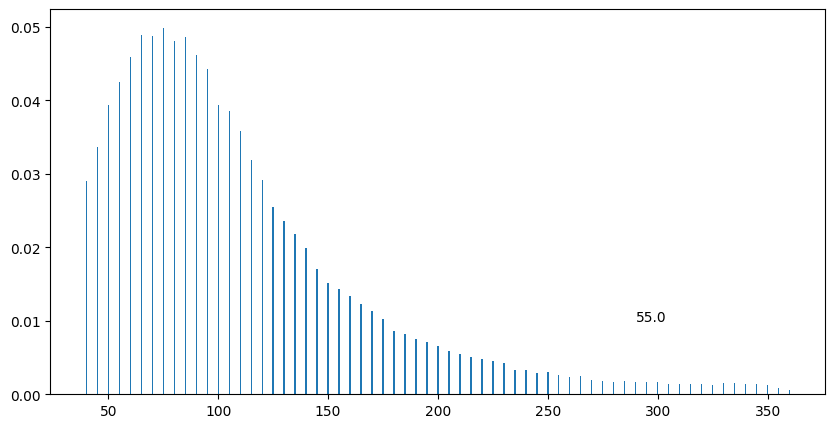

In [18]:
#выберем одну стойку
rasp = arrival_profile_value[arrival_profile_value['airline_grouped_hash'] == '7bac920cc30511dfb81ca2242b293990']
#отсортируем в хронологическом порядке прибытие пассажиров
rasp = rasp.sort_values (by= 'arrival_profile', ascending = False)
#посчитаем куммулятивную сумму, чтобы понимать долю зарегистрированных пассажиров
rasp['value_sum'] = rasp['value'].cumsum()

dola = rasp[rasp['value_sum'] <= 0.9] #за 55 мин до вылета 90% пассажиров уже зарегистрированы

fig = plt.figure(figsize = (10, 5))
ax = plt.bar (rasp.arrival_profile, rasp.value, width = 0.6)
plt.text(290, 0.01, dola['arrival_profile'].iloc[-1])
plt.show()

рассчитаем время до окончиния регистрации на рейс, в которое прибывают 90% пассажиров. И найдем среднее по всем стойкам

In [19]:
arrival_profile_value['airline_grouped_hash'].unique()

array(['7bac920cc30511dfb81ca2242b293990',
       '3e8d115eb4b32b9e9479f387dbe14ee1',
       '928568b84963ceb76aaaa2cae9afdbfa',
       '7f58de3a72e00a866a762143cd799b49',
       'e2fca8135c2fadca093abd79a6b1c0d2',
       'edd716d0f00574fd83903feb705d290f',
       '1b2d5bac041ba5c7062079117011b112',
       'd38212a0c0e98f678feaaa5a8b9167f5',
       'e3ea649cdf1edd0eb02c4d8c2a15168e',
       '05184b2fec44bde3ebe5d5f386d7e1eb',
       '3df6c1edff7b174300e1a38a6322cd6d',
       '4bba3ab232fc6c57e7dbb1f5932b61d0',
       '3621a25ed04e97eaf99f9fbe17b1b5f8',
       'c4d62b6dcca08e5caf06c01889282859',
       '655610c16fda311d29ed2360a1ffcbd1',
       'fa2649300e79b95a974c00e60a4a5b61',
       '4e36d5be1057ca04d9d2099c759c5347',
       '0539f4139fdf8b3b7ca00bb4f460261f',
       'd0b1bfd50dd40176f497a2915a6e579b',
       '7797a4977c3a265c0b62d06f3b3111e0',
       'e99c19dec2b574bc5d4990504f6cf550',
       'fa868488740aa25870ced6b9169951fb',
       'bbd97b00c539801e32317ab550867ec4',
       '7da

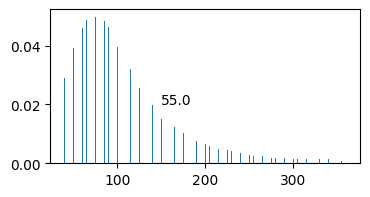

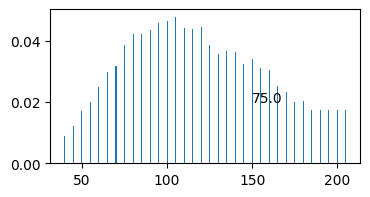

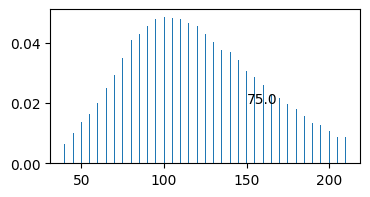

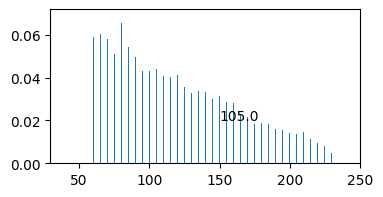

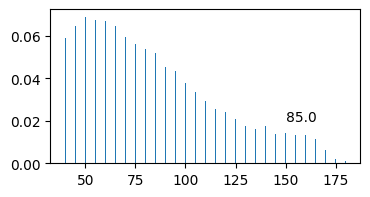

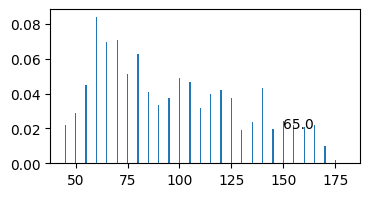

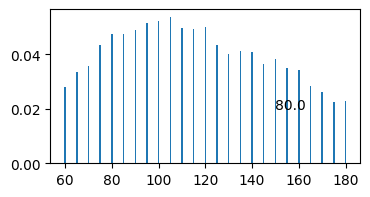

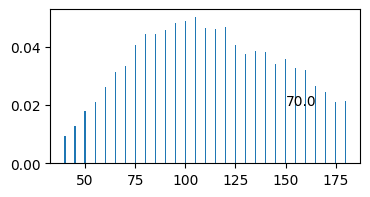

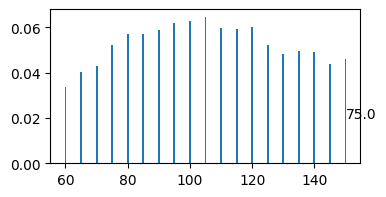

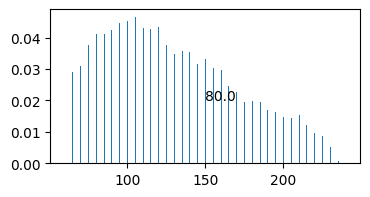

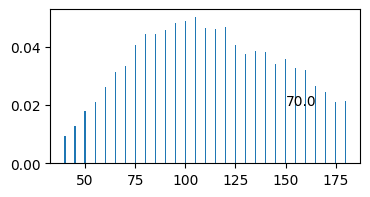

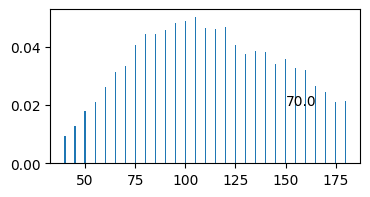

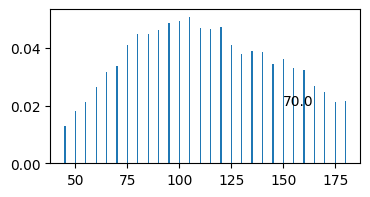

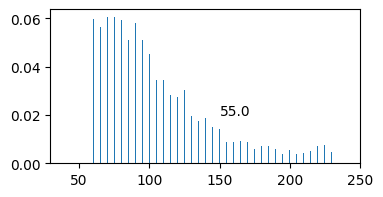

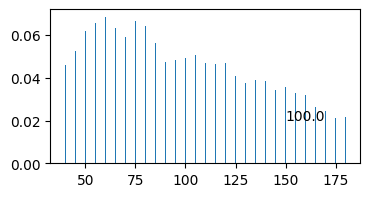

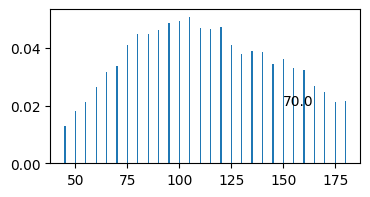

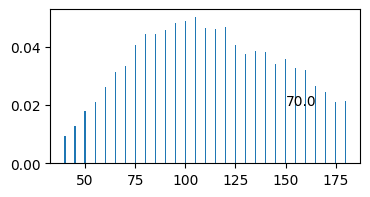

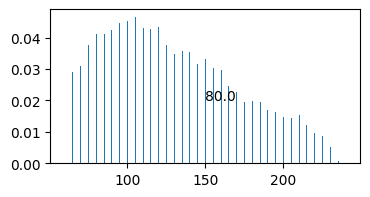

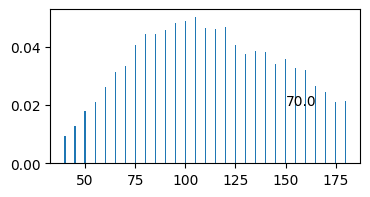

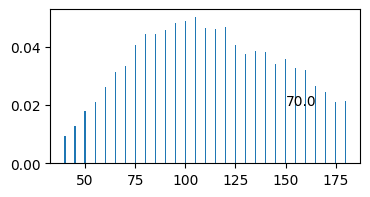

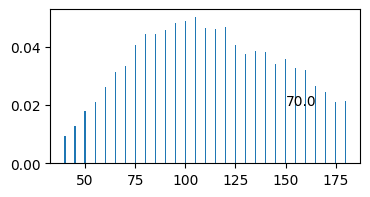

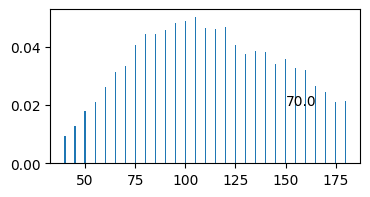

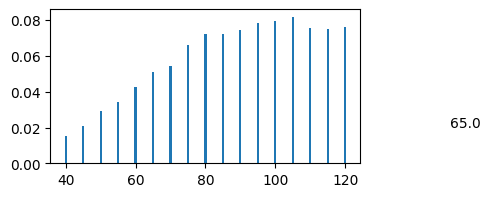

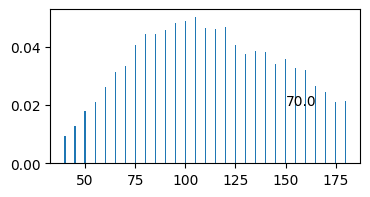

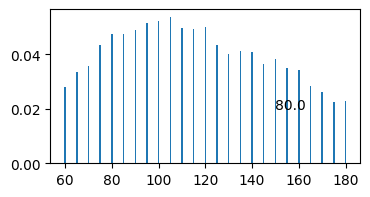

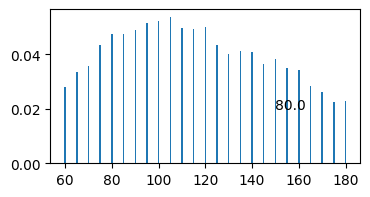

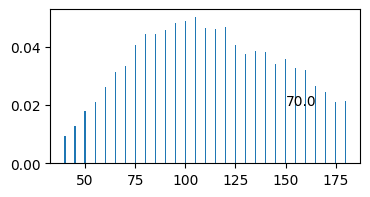

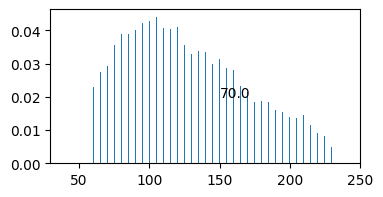

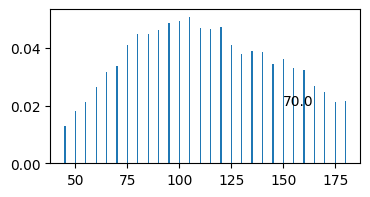

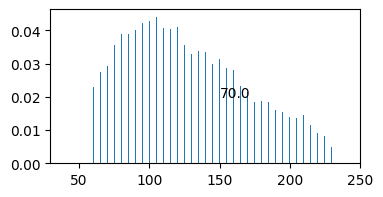

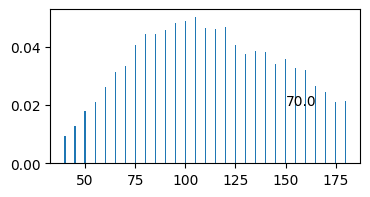

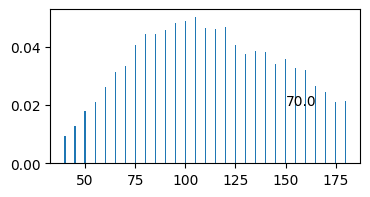

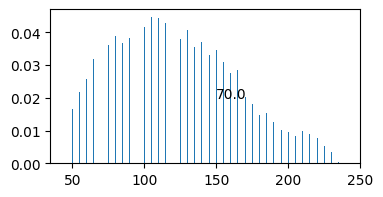

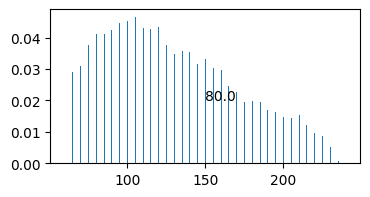

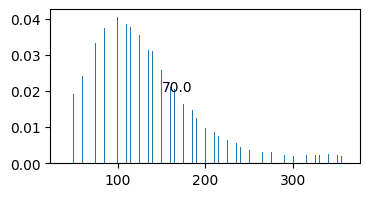

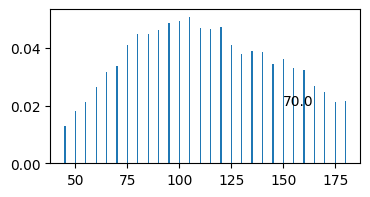

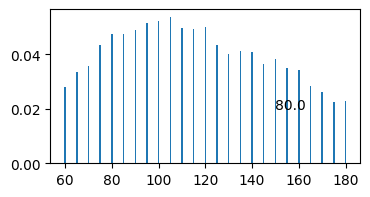

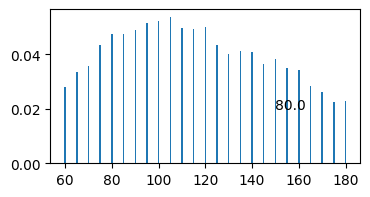

In [20]:
dola_90 = []
for stoika in arrival_profile_value['airline_grouped_hash'].unique():
  rasp = arrival_profile_value[arrival_profile_value['airline_grouped_hash'] == stoika]
  rasp = rasp.sort_values (by= 'arrival_profile', ascending = False)
  rasp['value_sum'] = rasp['value'].cumsum()
  dola = rasp[rasp['value_sum'] <= 0.9]

  fig = plt.figure(figsize = (4, 2))
  ax = plt.bar (rasp.arrival_profile, rasp.value, width = 0.6)
  plt.text(150, 0.02, dola['arrival_profile'].iloc[-1])
  plt.show()
  dola_90.append(dola['arrival_profile'].iloc[-1])

In [21]:
#выбросы в данном списке указывают на стойки, на которых произошла не стандартная ситуация:
#90% пассажиров зарегистрировались или слишком рано (105) или слишком поздно (55)
dola_90

[55.0,
 75.0,
 75.0,
 105.0,
 85.0,
 65.0,
 80.0,
 70.0,
 75.0,
 80.0,
 70.0,
 70.0,
 70.0,
 55.0,
 100.0,
 70.0,
 70.0,
 80.0,
 70.0,
 70.0,
 70.0,
 70.0,
 65.0,
 70.0,
 80.0,
 80.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 80.0,
 70.0,
 70.0,
 80.0,
 80.0]

In [22]:
sum(dola_90)/len(dola_90)
#73 мин - в среднем это то время до вылета, когда мы знаем данные о багаже 90% пассажиров

73.55263157894737

In [23]:
#дополним данные по профилю прибытия информацией о времени до отлета, когда зарегистрированы 90% пассажиров
reg_time = {x : y for x, y in zip(arrival_profile_value['airline_grouped_hash'].unique(), dola_90)}
arrival_profile_value['reg_time_90'] = 0
for i in range (len (arrival_profile_value)):
  for x,y in reg_time.items():
    if arrival_profile_value['airline_grouped_hash'][i] == x:
      arrival_profile_value['reg_time_90'][i] = y
arrival_profile_value.head()

<ipython-input-23-4a8ae1818c2c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrival_profile_value['reg_time_90'][i] = y


,checkin_terminal,airline_grouped_hash,arrival_profile,value,season,reg_time_90
0,B,7bac920cc30511dfb81ca2242b293990,180.0,0.008569,S23,55
1,B,7bac920cc30511dfb81ca2242b293990,185.0,0.008135,S23,55
2,B,7bac920cc30511dfb81ca2242b293990,190.0,0.007548,S23,55
3,B,7bac920cc30511dfb81ca2242b293990,195.0,0.007107,S23,55
4,B,7bac920cc30511dfb81ca2242b293990,200.0,0.006526,S23,55


In [24]:
dola_75 = []
for stoika in arrival_profile_value['airline_grouped_hash'].unique():
  rasp = arrival_profile_value[arrival_profile_value['airline_grouped_hash'] == stoika]
  rasp = rasp.sort_values (by= 'arrival_profile', ascending = False)
  rasp['value_sum'] = rasp['value'].cumsum()
  dola = rasp[rasp['value_sum'] <= 0.75]
  dola_75.append(dola['arrival_profile'].iloc[-1])

In [25]:
reg_time = {x : y for x, y in zip(arrival_profile_value['airline_grouped_hash'].unique(), dola_75)}
arrival_profile_value['reg_time_75'] = 0
for i in range (len (arrival_profile_value)):
  for x,y in reg_time.items():
    if arrival_profile_value['airline_grouped_hash'][i] == x:
      arrival_profile_value['reg_time_75'][i] = y
arrival_profile_value.head()

<ipython-input-25-b49b63841ed0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrival_profile_value['reg_time_75'][i] = y


,checkin_terminal,airline_grouped_hash,arrival_profile,value,season,reg_time_90,reg_time_75
0,B,7bac920cc30511dfb81ca2242b293990,180.0,0.008569,S23,55,75
1,B,7bac920cc30511dfb81ca2242b293990,185.0,0.008135,S23,55,75
2,B,7bac920cc30511dfb81ca2242b293990,190.0,0.007548,S23,55,75
3,B,7bac920cc30511dfb81ca2242b293990,195.0,0.007107,S23,55,75
4,B,7bac920cc30511dfb81ca2242b293990,200.0,0.006526,S23,55,75


In [26]:
dola_50 = []
for stoika in arrival_profile_value['airline_grouped_hash'].unique():
  rasp = arrival_profile_value[arrival_profile_value['airline_grouped_hash'] == stoika]
  rasp = rasp.sort_values (by= 'arrival_profile', ascending = False)
  rasp['value_sum'] = rasp['value'].cumsum()
  dola = rasp[rasp['value_sum'] <= 0.5]
  dola_50.append(dola['arrival_profile'].iloc[-1])

In [27]:
reg_time = {x : y for x, y in zip(arrival_profile_value['airline_grouped_hash'].unique(), dola_50)}
arrival_profile_value['reg_time_50'] = 0
for i in range (len (arrival_profile_value)):
  for x,y in reg_time.items():
    if arrival_profile_value['airline_grouped_hash'][i] == x:
      arrival_profile_value['reg_time_50'][i] = y
arrival_profile_value.head()

<ipython-input-27-36ef467611ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrival_profile_value['reg_time_50'][i] = y


,checkin_terminal,airline_grouped_hash,arrival_profile,value,season,reg_time_90,reg_time_75,reg_time_50
0,B,7bac920cc30511dfb81ca2242b293990,180.0,0.008569,S23,55,75,100
1,B,7bac920cc30511dfb81ca2242b293990,185.0,0.008135,S23,55,75,100
2,B,7bac920cc30511dfb81ca2242b293990,190.0,0.007548,S23,55,75,100
3,B,7bac920cc30511dfb81ca2242b293990,195.0,0.007107,S23,55,75,100
4,B,7bac920cc30511dfb81ca2242b293990,200.0,0.006526,S23,55,75,100


## Создаем датасет из имеющихся данных

In [28]:
bsm = bsm.merge (flight.set_index ('i_id'), on = 'i_id', validate ='m:m')
bsm.head()

,ident_bag,i_id,pax_id_hash,MessageReceivedDate,MessageProcessedDate,DateEvent,TagNumber,local_or_transfer,departure_terminal,checkin_terminal,airline_grouped_hash,cco_hash,flt_hash,t_st,m_city_rus1,m_city_rus2,config
0,62562416,8628981.0,dcd856b334b9685c4f21afa67f3ddc70,2023-07-01 06:53:34.413,2023-07-01 06:53:37.720,2023-07-01 06:53:37.717,2425399448,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189
1,62571791,8628981.0,dcd856b334b9685c4f21afa67f3ddc70,2023-07-01 06:53:24.603,2023-07-01 06:53:28.590,2023-07-01 06:53:28.577,2425388102,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189
2,62585837,8628981.0,d1deb9ad74e154bd45625253d3192aec,2023-07-01 04:31:58.227,2023-07-01 04:32:00.050,2023-07-01 04:32:00.050,425411640,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189
3,62585932,8628981.0,edfb80134c7e09bc74dfeead90097018,2023-07-01 04:36:45.607,2023-07-01 04:36:49.783,2023-07-01 04:36:49.780,425411641,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189
4,62585968,8628981.0,a784df5b95726a8e444007c37de942fc,2023-07-01 04:38:30.500,2023-07-01 04:38:33.753,2023-07-01 04:38:33.743,425411642,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189


In [29]:
arrival_profile_value = arrival_profile_value.drop(columns = ['season', 'checkin_terminal', 'arrival_profile', 'value'])
arrival_profile_value = arrival_profile_value.groupby (['airline_grouped_hash'], as_index = False).agg ({'reg_time_90':'mean', 'reg_time_75':'mean', 'reg_time_50':'mean'})

In [30]:
#добавляем инфо по времени до вылета и проценту зарегистрированных пассажиров
bsm = bsm.merge (arrival_profile_value.set_index ('airline_grouped_hash'), on = 'airline_grouped_hash', validate ='m:m')
bsm.head()

,ident_bag,i_id,pax_id_hash,MessageReceivedDate,MessageProcessedDate,DateEvent,TagNumber,local_or_transfer,departure_terminal,checkin_terminal,airline_grouped_hash,cco_hash,flt_hash,t_st,m_city_rus1,m_city_rus2,config,reg_time_90,reg_time_75,reg_time_50
0,62562416,8628981.0,dcd856b334b9685c4f21afa67f3ddc70,2023-07-01 06:53:34.413,2023-07-01 06:53:37.720,2023-07-01 06:53:37.717,2425399448,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0
1,62571791,8628981.0,dcd856b334b9685c4f21afa67f3ddc70,2023-07-01 06:53:24.603,2023-07-01 06:53:28.590,2023-07-01 06:53:28.577,2425388102,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0
2,62585837,8628981.0,d1deb9ad74e154bd45625253d3192aec,2023-07-01 04:31:58.227,2023-07-01 04:32:00.050,2023-07-01 04:32:00.050,425411640,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0
3,62585932,8628981.0,edfb80134c7e09bc74dfeead90097018,2023-07-01 04:36:45.607,2023-07-01 04:36:49.783,2023-07-01 04:36:49.780,425411641,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0
4,62585968,8628981.0,a784df5b95726a8e444007c37de942fc,2023-07-01 04:38:30.500,2023-07-01 04:38:33.753,2023-07-01 04:38:33.743,425411642,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0


In [31]:
#расчитаем время обработки сообщений
bsm['MessageReceivedDate'] = bsm['MessageReceivedDate'].apply (lambda x: np.datetime64(x))
bsm['MessageProcessedDate'] = bsm['MessageProcessedDate'].apply (lambda x: np.datetime64(x))

bsm['ProcessingTime'] = bsm['MessageProcessedDate'] - bsm['MessageReceivedDate']

#переведем время обработки сообщений в секунды
from datetime import timedelta
bsm['ProcessingTime']= bsm['ProcessingTime'].apply(lambda x: x.total_seconds())
bsm

,ident_bag,i_id,pax_id_hash,MessageReceivedDate,MessageProcessedDate,DateEvent,TagNumber,local_or_transfer,departure_terminal,checkin_terminal,...,cco_hash,flt_hash,t_st,m_city_rus1,m_city_rus2,config,reg_time_90,reg_time_75,reg_time_50,ProcessingTime
0,62562416,8628981.0,dcd856b334b9685c4f21afa67f3ddc70,2023-07-01 06:53:34.413,2023-07-01 06:53:37.720,2023-07-01 06:53:37.717,2425399448,L,B,C,...,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0,3.307
1,62571791,8628981.0,dcd856b334b9685c4f21afa67f3ddc70,2023-07-01 06:53:24.603,2023-07-01 06:53:28.590,2023-07-01 06:53:28.577,2425388102,L,B,C,...,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0,3.987
2,62585837,8628981.0,d1deb9ad74e154bd45625253d3192aec,2023-07-01 04:31:58.227,2023-07-01 04:32:00.050,2023-07-01 04:32:00.050,425411640,L,B,C,...,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0,1.823
3,62585932,8628981.0,edfb80134c7e09bc74dfeead90097018,2023-07-01 04:36:45.607,2023-07-01 04:36:49.783,2023-07-01 04:36:49.780,425411641,L,B,C,...,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0,4.176
4,62585968,8628981.0,a784df5b95726a8e444007c37de942fc,2023-07-01 04:38:30.500,2023-07-01 04:38:33.753,2023-07-01 04:38:33.743,425411642,L,B,C,...,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0,3.253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085308,64528126,8685054.0,eb852fdeb37a79d69997763d42401fce,2023-08-29 08:00:14.550,2023-08-29 08:00:15.343,2023-08-29 08:00:15.340,954226444,L,C,C,...,4bba3ab232fc6c57e7dbb1f5932b61d0,87f4d79e36d68c3031ccf6c55e9bbd39,2023-08-29 09:35:00,Москва,Шарм-эль-Шейх,186,70.0,90.0,115.0,0.793
2085309,64528144,8685054.0,335ccdfc8679cb2fcf806b8fd39921ff,2023-08-29 08:01:06.583,2023-08-29 08:01:10.110,2023-08-29 08:01:10.107,954226445,L,C,C,...,4bba3ab232fc6c57e7dbb1f5932b61d0,87f4d79e36d68c3031ccf6c55e9bbd39,2023-08-29 09:35:00,Москва,Шарм-эль-Шейх,186,70.0,90.0,115.0,3.527
2085310,64528149,8685054.0,12ae39c6cb2b04fbff887f267370719a,2023-08-29 08:01:15.520,2023-08-29 08:01:17.857,2023-08-29 08:01:17.853,954226446,L,C,C,...,4bba3ab232fc6c57e7dbb1f5932b61d0,87f4d79e36d68c3031ccf6c55e9bbd39,2023-08-29 09:35:00,Москва,Шарм-эль-Шейх,186,70.0,90.0,115.0,2.337
2085311,64528159,8685054.0,381c372eb90a811dfadc78bce37172ad,2023-08-29 08:01:37.457,2023-08-29 08:01:41.250,2023-08-29 08:01:41.247,954226447,L,C,C,...,4bba3ab232fc6c57e7dbb1f5932b61d0,87f4d79e36d68c3031ccf6c55e9bbd39,2023-08-29 09:35:00,Москва,Шарм-эль-Шейх,186,70.0,90.0,115.0,3.793


In [47]:
#функция для формирования датасета для определенной стойки регистрации

def create_df (company_name, bsm):
  bsm = bsm[bsm['cco_hash'] == company_name]

  #посчитаем количество сообщений ежеминутно
  bsmQuatity = bsm.set_index(['MessageReceivedDate']).config.resample('5T').count()
  df = pd.DataFrame (data=bsmQuatity)
  df = df.rename(columns ={'config' : 'bsmQuatity'})

  #добавим среднее время обработки сообщений
  df['MeanProcessingTime'] = bsm.set_index(['MessageReceivedDate']).ProcessingTime.resample('5T').mean()

  #добавим информацию об оставщемсядо вылета времени, когда зарегистрировано 90% пассажиров
  df['RegTime90'] = bsm.set_index(['MessageReceivedDate']).reg_time_90.resample('5T').mean()

  #добавим информацию об оставщемсядо вылета времени, когда зарегистрировано 75% пассажиров
  df['RegTime75'] = bsm.set_index(['MessageReceivedDate']).reg_time_75.resample('5T').mean()

  #добавим информацию об оставщемсядо вылета времени, когда зарегистрировано 50% пассажиров
  df['RegTime50'] = bsm.set_index(['MessageReceivedDate']).reg_time_50.resample('5T').mean()

  return df

In [52]:
#по каждой стоке построим датасет
df_1 = create_df(top5[0], bsm).fillna(0)
df_2 = create_df(top5[1], bsm).fillna(0)
df_3 = create_df(top5[2], bsm).fillna(0)
df_4 = create_df(top5[3], bsm).fillna(0)
df_5 = create_df(top5[4], bsm).fillna(0)

In [53]:
#датасет по всем стойкам

bsmQuatity = bsm.set_index(['MessageReceivedDate']).config.resample('5T').count()
df = pd.DataFrame (data=bsmQuatity)
df = df.rename(columns ={'config' : 'bsmQuatity'})
df['MeanProcessingTime'] = bsm.set_index(['MessageReceivedDate']).ProcessingTime.resample('5T').mean()
df['RegTime90'] = bsm.set_index(['MessageReceivedDate']).reg_time_90.resample('5T').mean()
df['RegTime75'] = bsm.set_index(['MessageReceivedDate']).reg_time_75.resample('5T').mean()
df['RegTime50'] = bsm.set_index(['MessageReceivedDate']).reg_time_50.resample('5T').mean()
df

,bsmQuatity,MeanProcessingTime,RegTime90,RegTime75,RegTime50
MessageReceivedDate,,,,,
2023-07-01 00:00:00,100,3.114310,67.700000,85.350000,110.950000
2023-07-01 00:05:00,89,2.890719,67.359551,85.449438,111.235955
2023-07-01 00:10:00,125,2.824536,64.360000,83.040000,108.680000
2023-07-01 00:15:00,123,2.713967,65.691057,84.024390,110.406504
2023-07-01 00:20:00,122,2.697230,63.278689,82.254098,109.057377
...,...,...,...,...,...
2023-08-31 23:35:00,117,2.159402,72.521368,89.401709,114.358974
2023-08-31 23:40:00,134,2.257866,72.276119,89.067164,113.917910
2023-08-31 23:45:00,144,2.103785,74.479167,90.972222,116.666667


##графики временных рядов по стойкам и в общем

In [54]:
#функция для отрисовки графиков временных рядов
def visual_ts (df):
	values = df.values
	# specify columns to plot
	groups = [0, 1, 2, 3, 4]
	i = 1
	# plot each column
	plt.figure(figsize=(15, 8))
	for group in groups:
		plt.subplot(len(groups), 1, i)
		plt.plot(values[:, group])
		plt.title(df.columns[group], y=0.5, loc='right')
		i += 1
	plt.show()

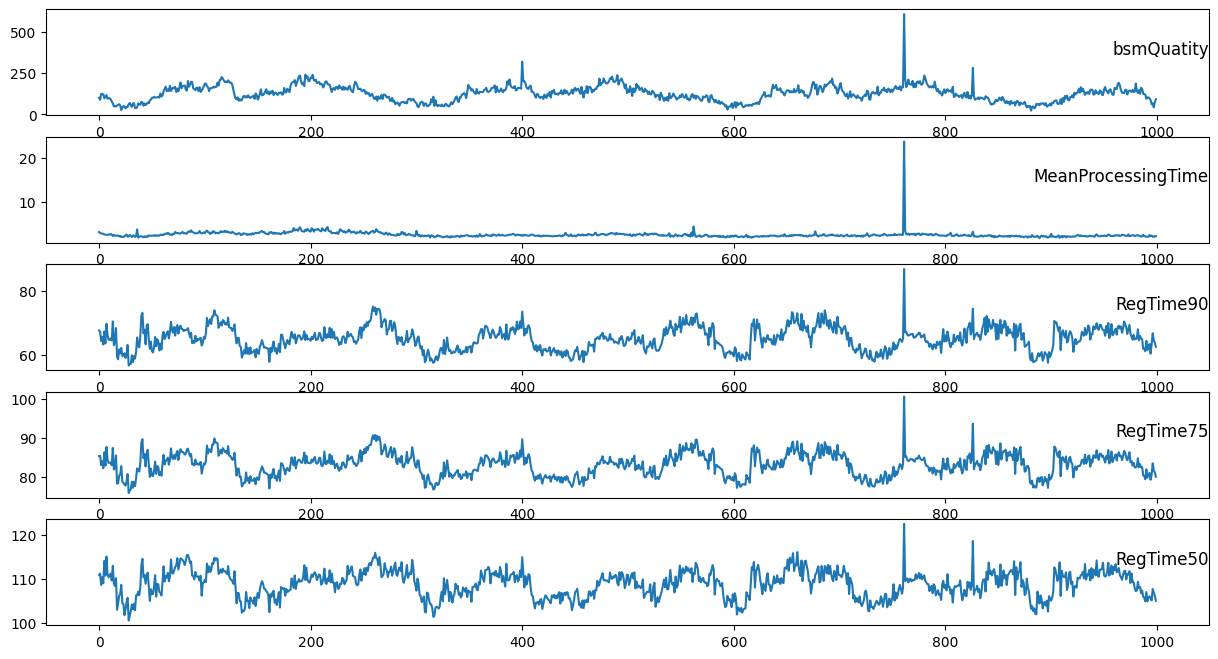

In [55]:
#построим графики получившихся временных рядов
#график по всем стойкам:
visual_ts(df[:1000])

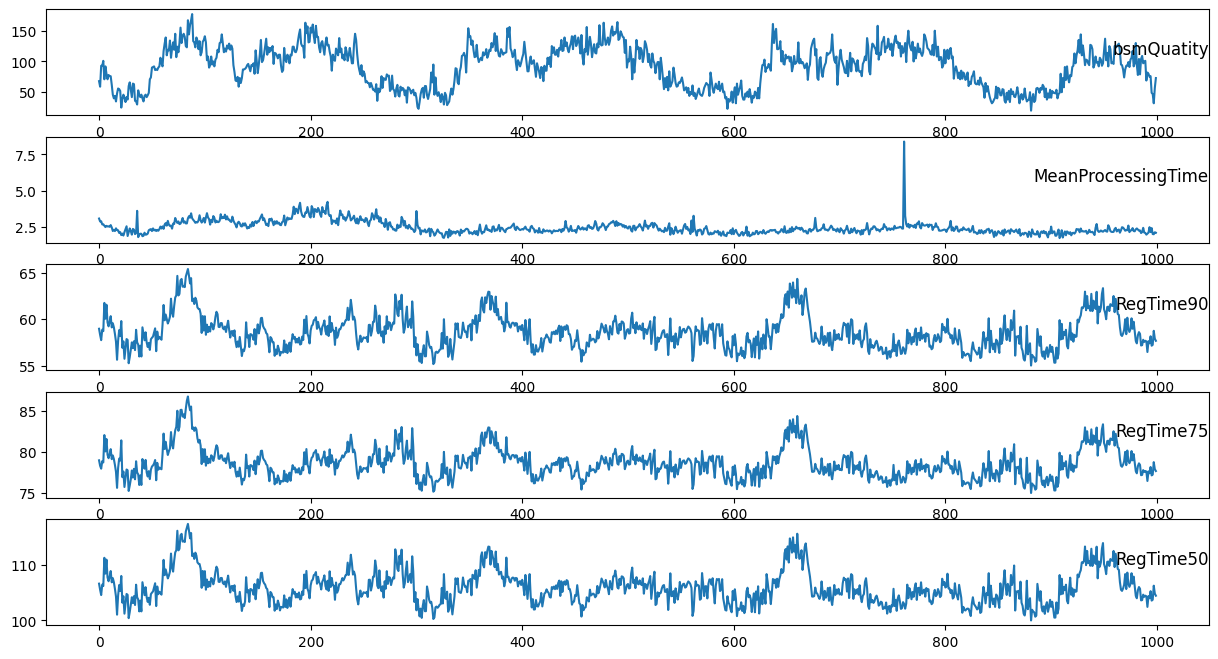

In [56]:
#графики для стойки 1

visual_ts(df_1[:1000])


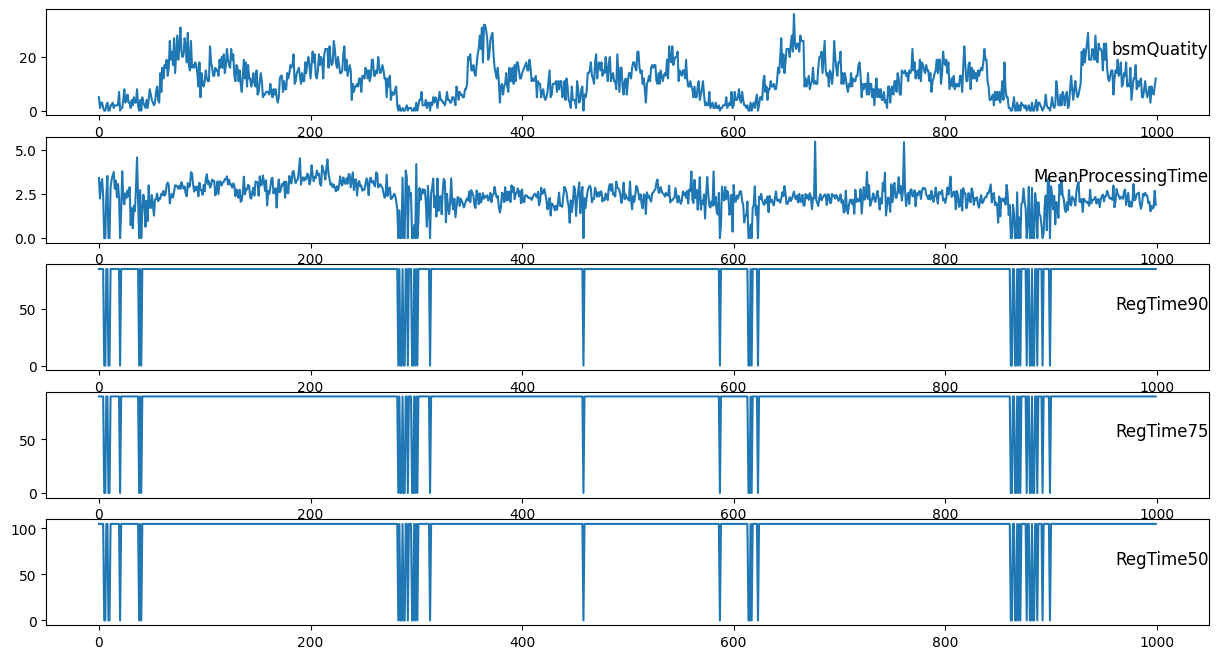

In [62]:
visual_ts(df_2[:1000])

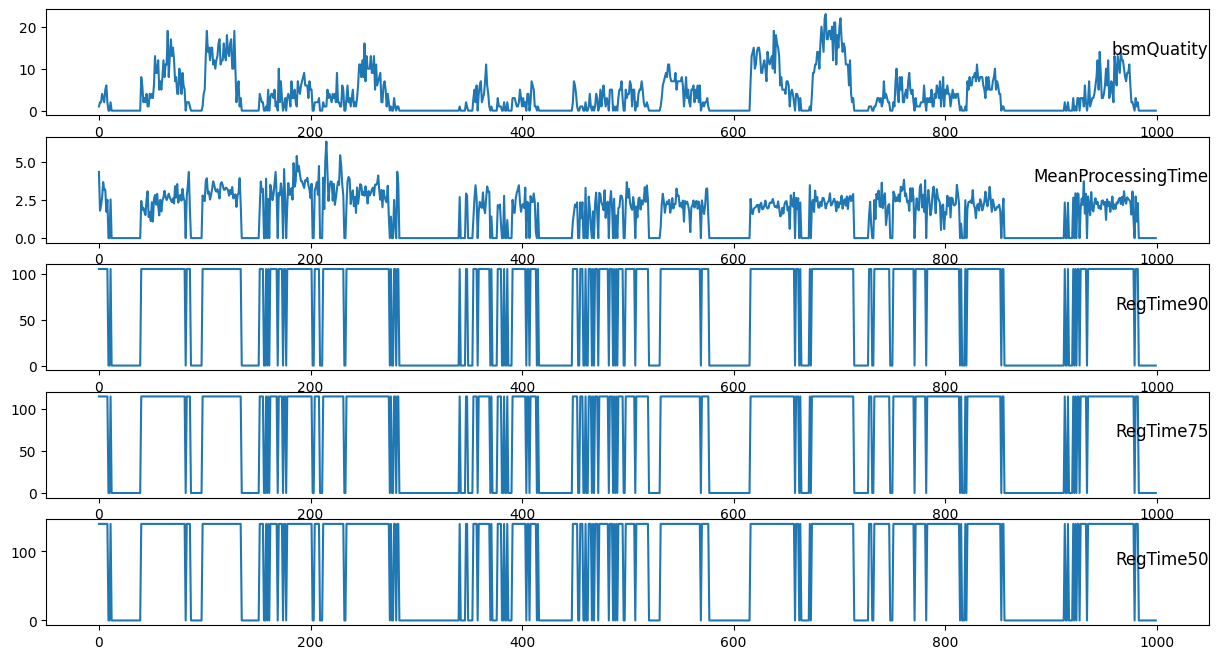

In [63]:
visual_ts(df_3[:1000])

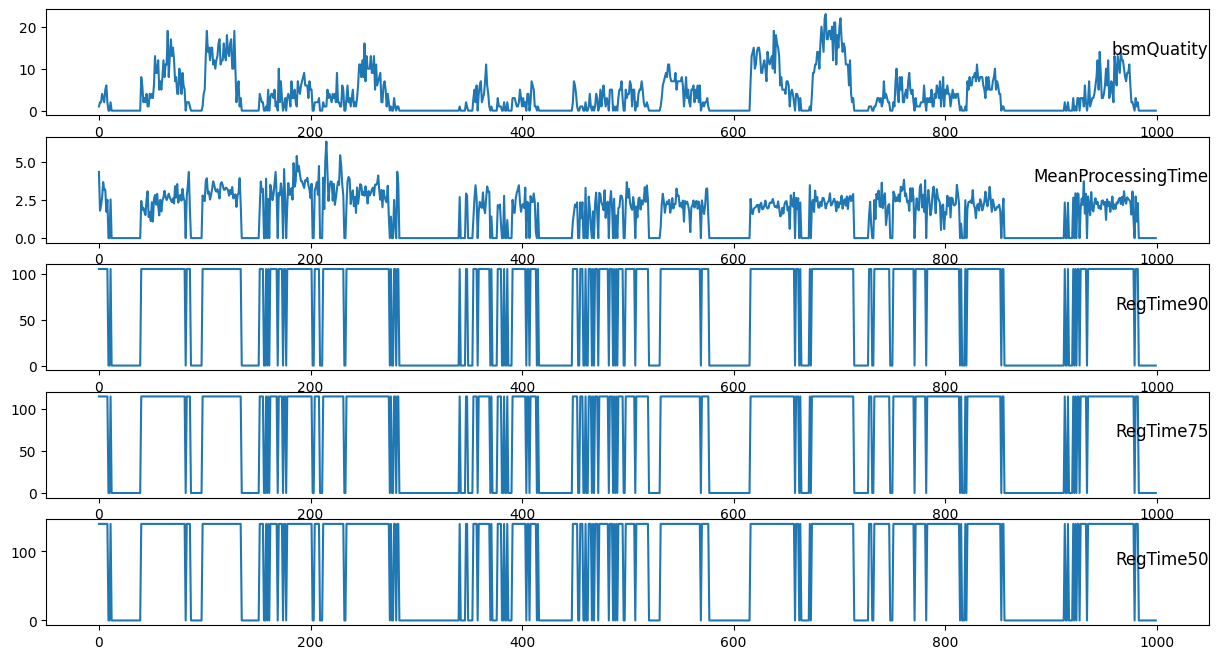

In [64]:
visual_ts(df_3[:1000])

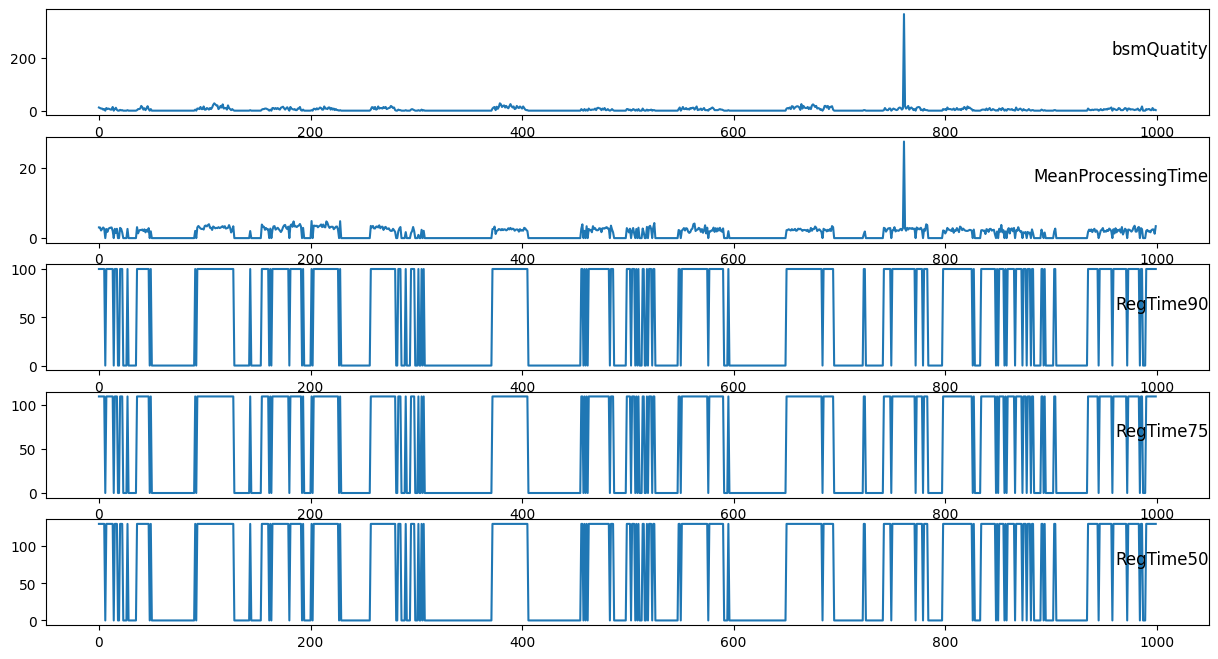

In [65]:
visual_ts(df_4[:1000])

In [61]:
df.to_csv('df.csv', index = False)
print ('Ready!')

Ready!


##модель/прогноз (bsm quantity)

In [66]:
len(df)

17856

In [67]:
#делим на трейн и валидацию:

X = df['bsmQuatity']

X_train = X[:14000]
X_valid = X[14000:]


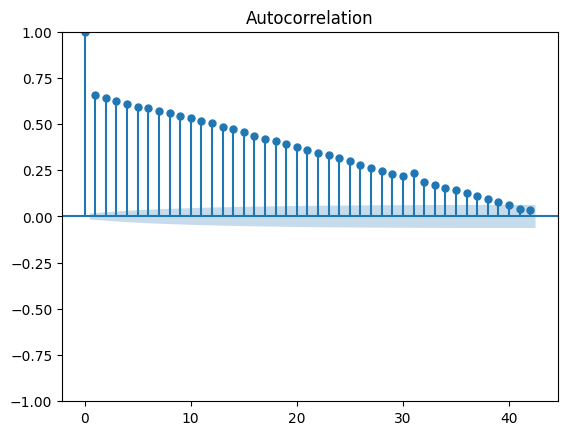

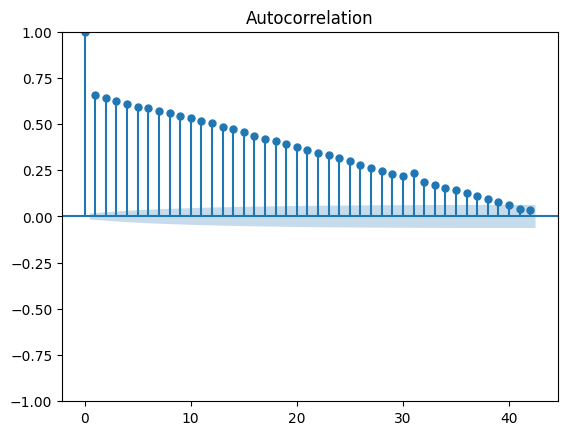

In [68]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(X_train)

In [69]:
from statsmodels.tsa.stattools import adfuller
print (adfuller (X_train)[1])

#ряд стационарный (значение теста Дикки-Фуллера низкое) с высокой автокорреляцией и без сезонности

1.0178553535792685e-29


In [70]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.4 MB/s eta 0:00:00


In [71]:
from pmdarima.arima import auto_arima
model_bsm = auto_arima(X_train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=136275.358, Time=7.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=147582.193, Time=0.84 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=139749.481, Time=1.94 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=143925.101, Time=5.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=175049.896, Time=0.60 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=136784.118, Time=6.55 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=136987.019, Time=7.88 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=136242.030, Time=9.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=136713.325, Time=9.75 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=136195.645, Time=8.18 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=136427.111, Time=6.71 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=136169.250, Time=12.48 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=136299.389, Time=13.65 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=136127.439, Time=17.91 sec
 A

In [80]:
# прогноз можем получить методом predict, указав горизонт прогнозирования
preds = model_bsm.predict(len(X_valid))

In [81]:
result = pd.DataFrame (data = preds)
result['real'] = X_valid
diff = preds - X_valid
result ['difference'] = diff
result

,0,real,difference
2023-08-18 14:40:00,126.634620,107,19.634620
2023-08-18 14:45:00,126.363046,145,-18.636954
2023-08-18 14:50:00,125.882012,113,12.882012
2023-08-18 14:55:00,125.340202,114,11.340202
2023-08-18 15:00:00,125.103392,148,-22.896608
...,...,...,...
2023-08-31 23:35:00,121.719669,117,4.719669
2023-08-31 23:40:00,121.719669,134,-12.280331
2023-08-31 23:45:00,121.719669,144,-22.280331
2023-08-31 23:50:00,121.719669,158,-36.280331


## модель/прогноз (MeanProcessintTime)

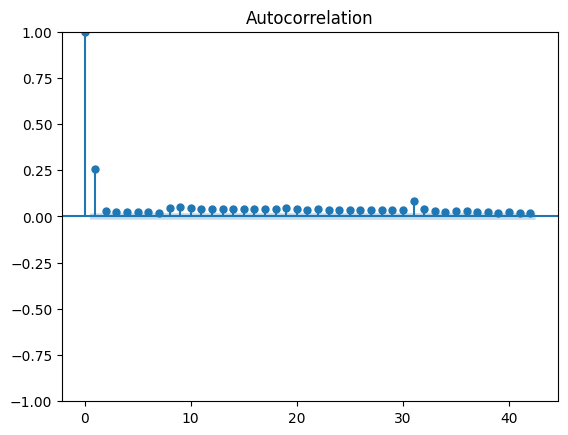

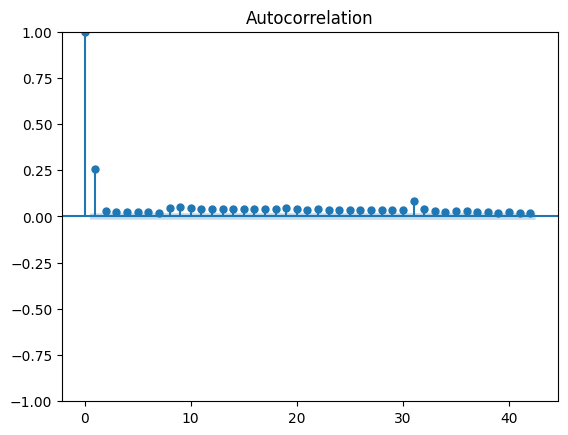

In [99]:
X2 = df['MeanProcessingTime'].fillna(0)

X2_train = X2[:14000]
X2_valid = X2[14000:]

plot_acf(X2_train)

In [100]:
print (adfuller (X2_train)[1])

1.536260679599162e-26


In [104]:
model_mpt = auto_arima(X2_train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=30200.016, Time=10.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=36297.362, Time=4.59 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=34525.799, Time=1.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=30670.619, Time=3.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=36295.362, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=30067.632, Time=6.68 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=30196.969, Time=4.70 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=30448.056, Time=5.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=29972.610, Time=7.43 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=30063.576, Time=5.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=30052.349, Time=8.75 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=29928.241, Time=12.79 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=29806.018, Time=9.20 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=8.40 sec
 ARIMA(1,1,5)(0,0,0)[0]

In [105]:
preds2 = model_mpt.predict(len(X2_valid))

In [107]:
result['pred_mpt'] = preds2
result['real_mpt'] = X2_valid
diff2 = preds2 - X2_valid
result ['difference2'] = diff2
result

,0,real,difference,pred_mpt,real_mpt,difference2
2023-08-18 14:40:00,126.634620,107,19.634620,2.200137,2.397589,-0.197452
2023-08-18 14:45:00,126.363046,145,-18.636954,2.173433,2.122462,0.050971
2023-08-18 14:50:00,125.882012,113,12.882012,2.173296,2.217195,-0.043899
2023-08-18 14:55:00,125.340202,114,11.340202,2.173362,2.199956,-0.026594
2023-08-18 15:00:00,125.103392,148,-22.896608,2.173262,2.226696,-0.053434
...,...,...,...,...,...,...
2023-08-31 23:35:00,121.719669,117,4.719669,2.173262,2.159402,0.013860
2023-08-31 23:40:00,121.719669,134,-12.280331,2.173262,2.257866,-0.084604
2023-08-31 23:45:00,121.719669,144,-22.280331,2.173262,2.103785,0.069477
2023-08-31 23:50:00,121.719669,158,-36.280331,2.173262,2.292481,-0.119219


In [108]:
df.describe().applymap("{0:.5f}".format)

,bsmQuatity,MeanProcessingTime,RegTime90,RegTime75,RegTime50
count,17856.00000,17849.00000,17849.00000,17849.00000,17849.00000
mean,116.78500,2.24696,65.80145,83.73531,109.48968
std,45.66587,0.68376,3.84668,3.09522,3.24018
min,0.00000,1.44353,55.26316,75.26316,100.13514
25%,88.00000,2.10568,63.17308,81.58273,107.18519
50%,117.00000,2.21418,65.63889,83.76238,109.66216
75%,145.00000,2.33199,68.33333,85.76190,111.67683
max,1953.00000,53.99939,88.10646,101.05585,125.30303


In [ ]:
result.describe()

,0,real,difference
count,9280.000000,9280.000000,9280.000000
mean,5.275380,23.710560,-18.435180
std,5.477855,9.111342,10.028063
min,0.391443,2.000000,-55.118769
25%,1.065997,17.000000,-24.933501
50%,2.902974,23.000000,-18.537937
75%,7.905520,30.000000,-11.732308
max,22.295523,59.000000,18.600926
